# DETECTION OF ANOMALOUS ENERGY CONSUMPTION IN CAF TRAINS

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV

# Load the dataset
df = pd.read_csv('Sample_Files/Energy_LineApril2022to2024.csv', sep=',')

# Display basic information about the dataset
print(df.info())

# Ensure correct data types
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

# Display the first few rows to verify
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162164 entries, 0 to 3162163
Data columns (total 32 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   ut                                        int64  
 1   start_date                                object 
 2   end_date                                  object 
 3   current_station                           object 
 4   next_station                              object 
 5   current_station_code                      int64  
 6   next_station_code                         int64  
 7   client_line                               object 
 8   track                                     int64  
 9   tiempo_marcha                             float64
 10  tiempo_parada                             float64
 11  in_service                                int64  
 12  si_siv_nservice                           int64  
 13  si_siv_ndriver                            int64  
 14  si

In [54]:
print(df.isnull().sum())

ut                                              0
start_date                                      0
end_date                                        0
current_station                                 0
next_station                                    0
current_station_code                            0
next_station_code                               0
client_line                                     0
track                                           0
tiempo_marcha                                1289
tiempo_parada                                1289
in_service                                      0
si_siv_nservice                                 0
si_siv_ndriver                                  0
si_siv_ndriver_def                              0
si_siv_ndriver_category                         0
avg_voltage                                   355
kilometres                                  28372
net_energy_consumed_by_UT                       0
auxiliary_energy_consumed                       0


In [55]:
df['kilometres'].fillna(df['kilometres'].mean(), inplace=True)
df['avg_voltage'].fillna(df['avg_voltage'].mean(), inplace=True)

In [56]:
# Displaying summary statistics
print(df.describe())

                 ut  current_station_code  next_station_code         track  \
count  3.162164e+06          3.162164e+06       3.162164e+06  3.162164e+06   
mean   9.158407e+02          7.654485e+01       7.656853e+01  1.500553e+00   
std    8.614746e+00          4.376412e+01       4.375241e+01  4.999998e-01   
min    9.010000e+02          7.000000e+00       7.000000e+00  1.000000e+00   
25%    9.080000e+02          5.800000e+01       5.800000e+01  1.000000e+00   
50%    9.160000e+02          6.600000e+01       6.600000e+01  2.000000e+00   
75%    9.230000e+02          7.500000e+01       7.500000e+01  2.000000e+00   
max    9.300000e+02          2.170000e+02       2.170000e+02  2.000000e+00   

       tiempo_marcha  tiempo_parada    in_service  si_siv_nservice  \
count   3.160875e+06   3.160875e+06  3.162164e+06     3.162164e+06   
mean    1.675636e+02   2.346950e+01  9.997296e-01     5.020529e+03   
std     1.133793e+02   4.397170e+01  1.644115e-02     3.090693e+03   
min     6.000000e

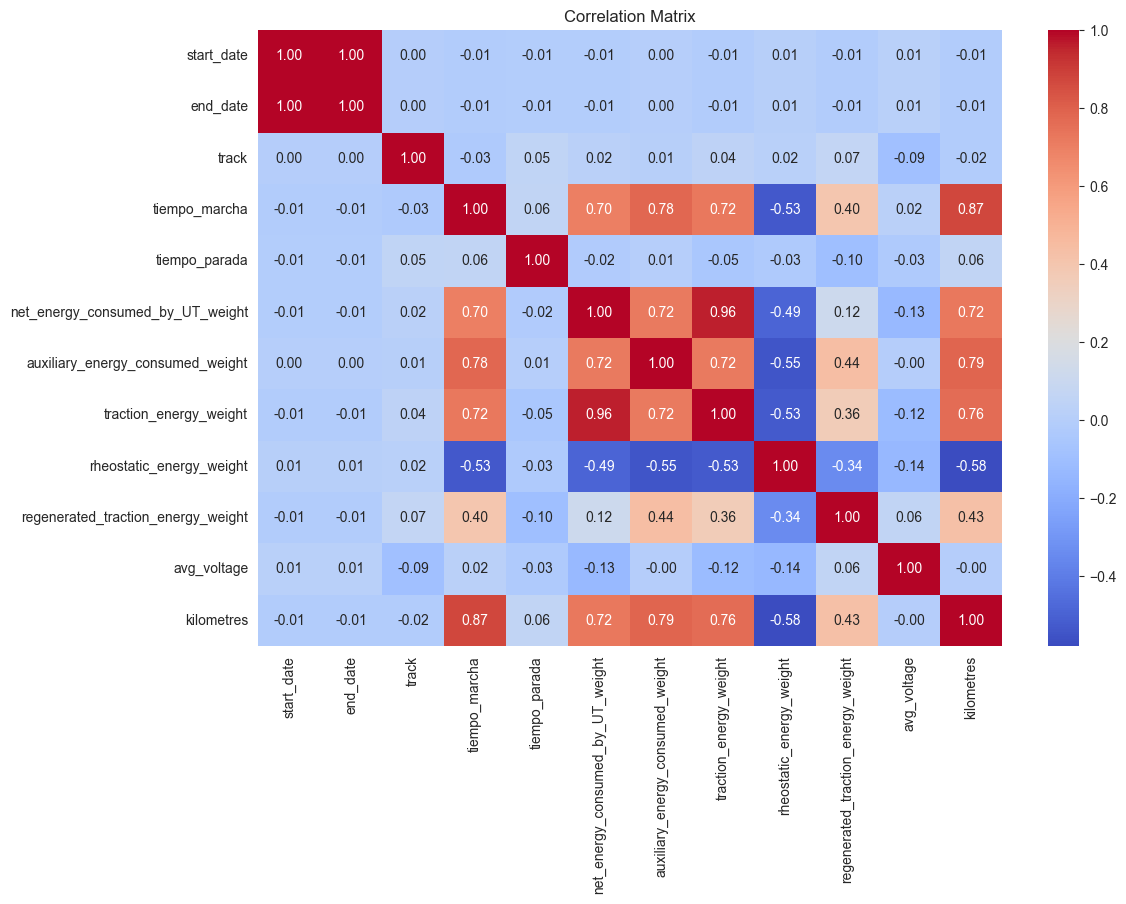

In [57]:
# Correlation analysis
correlation_matrix = df[['start_date', 'end_date', 'track', 'tiempo_marcha', 'tiempo_parada', 'net_energy_consumed_by_UT_weight', 'auxiliary_energy_consumed_weight', 'traction_energy_weight', 'rheostatic_energy_weight', 'regenerated_traction_energy_weight', 'avg_voltage', 'kilometres']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

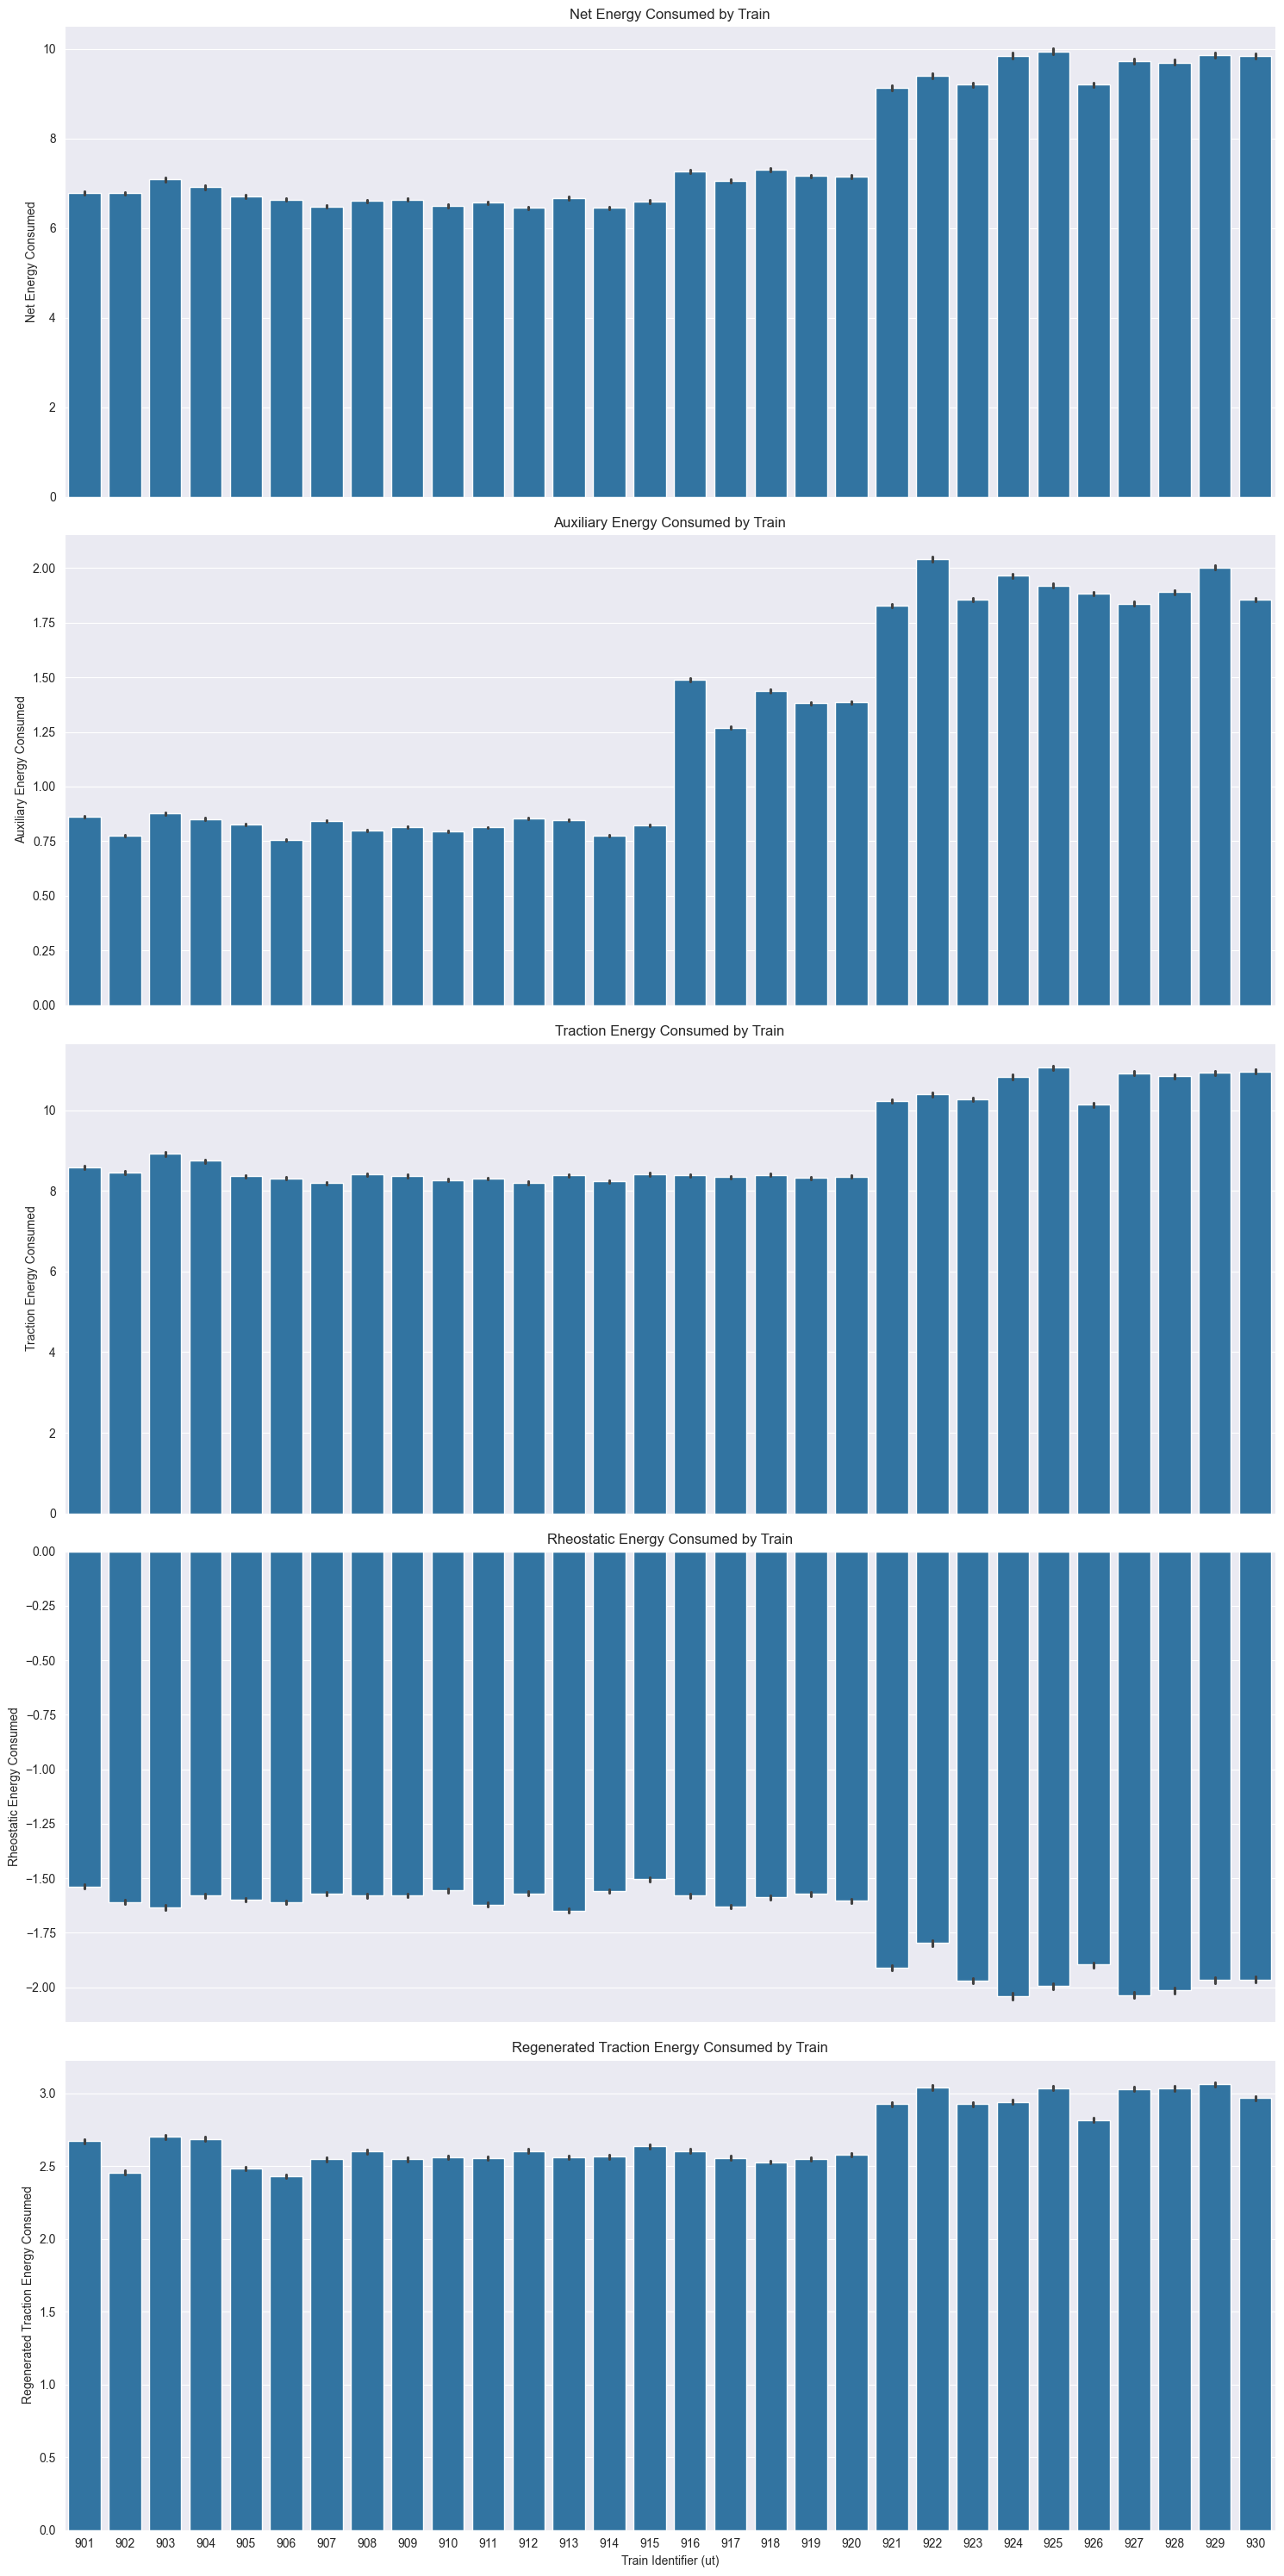

In [58]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(5, 1, figsize=(15, 30), sharex=True)

# Plot Net Energy Consumed
sns.barplot(ax=axes[0], x='ut', y='net_energy_consumed_by_UT_weight', data=df)
axes[0].set_title('Net Energy Consumed by Train')
axes[0].set_ylabel('Net Energy Consumed')

# Plot Auxiliary Energy Consumed
sns.barplot(ax=axes[1], x='ut', y='auxiliary_energy_consumed_weight', data=df)
axes[1].set_title('Auxiliary Energy Consumed by Train')
axes[1].set_ylabel('Auxiliary Energy Consumed')

# Plot Traction Energy Consumed
sns.barplot(ax=axes[2], x='ut', y='traction_energy_weight', data=df)
axes[2].set_title('Traction Energy Consumed by Train')
axes[2].set_ylabel('Traction Energy Consumed')

# Plot Rheostatic Energy Consumed
sns.barplot(ax=axes[3], x='ut', y='rheostatic_energy_weight', data=df)
axes[3].set_title('Rheostatic Energy Consumed by Train')
axes[3].set_ylabel('Rheostatic Energy Consumed')

# Plot Regenerated Traction Energy Consumed
sns.barplot(ax=axes[4], x='ut', y='regenerated_traction_energy_weight', data=df)
axes[4].set_title('Regenerated Traction Energy Consumed by Train')
axes[4].set_ylabel('Regenerated Traction Energy Consumed')

# Set the x-axis labels for all subplots
for ax in axes:
    ax.set_xlabel('Train Identifier (ut)')

# Adjust layout for better spacing between subplots
plt.tight_layout()
plt.show()

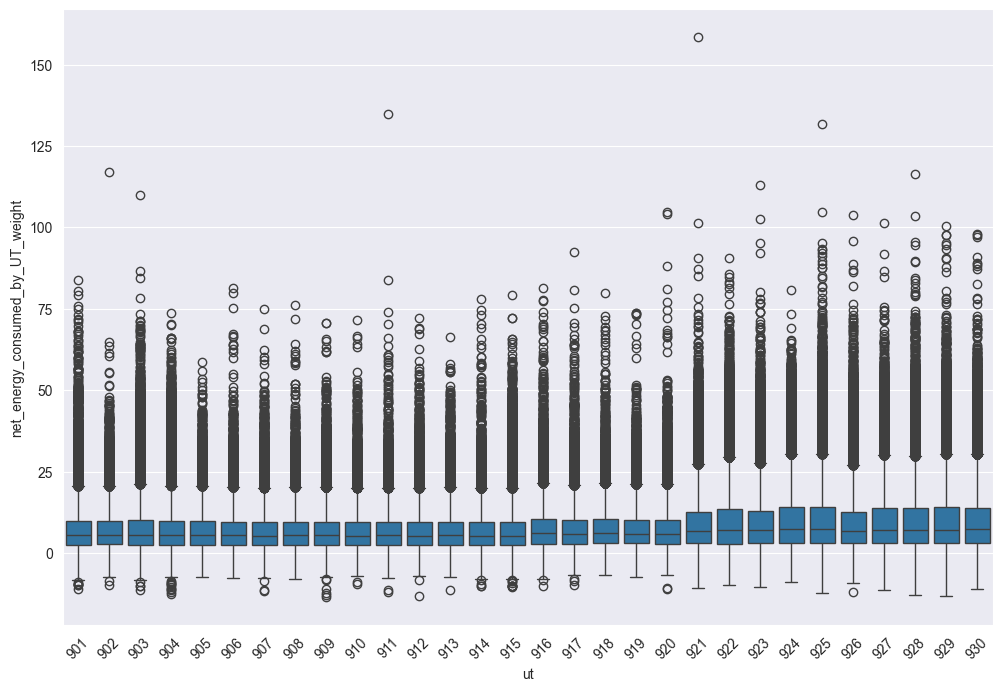

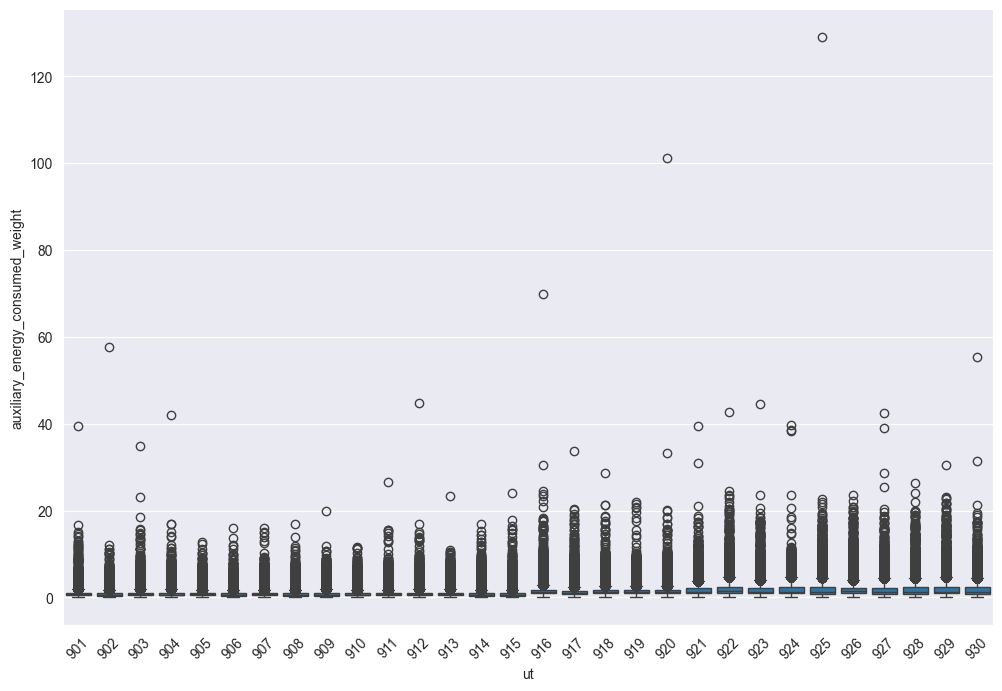

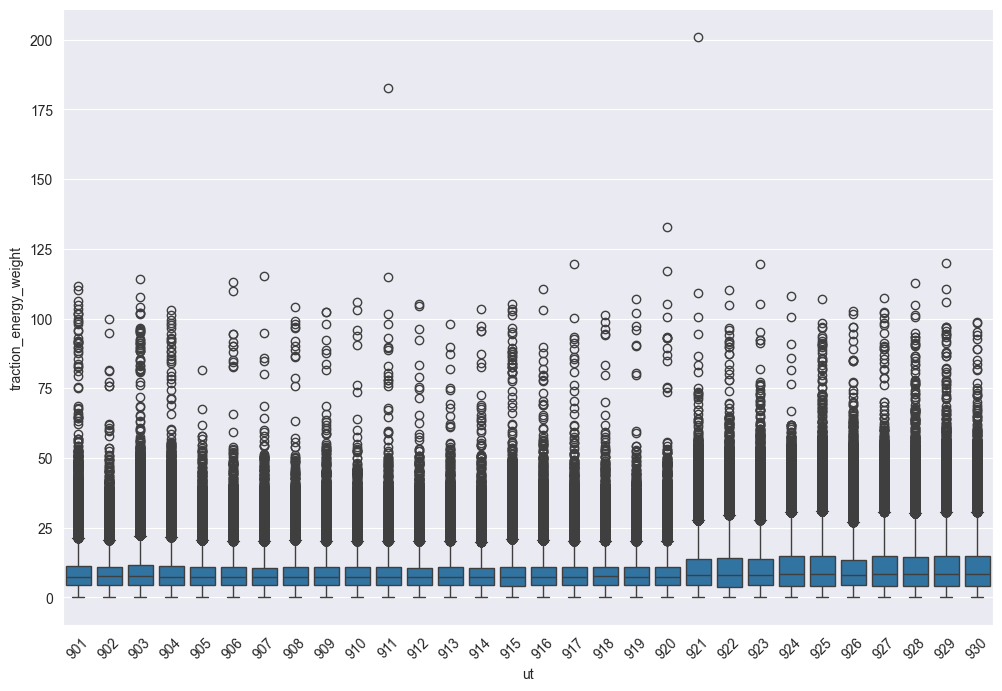

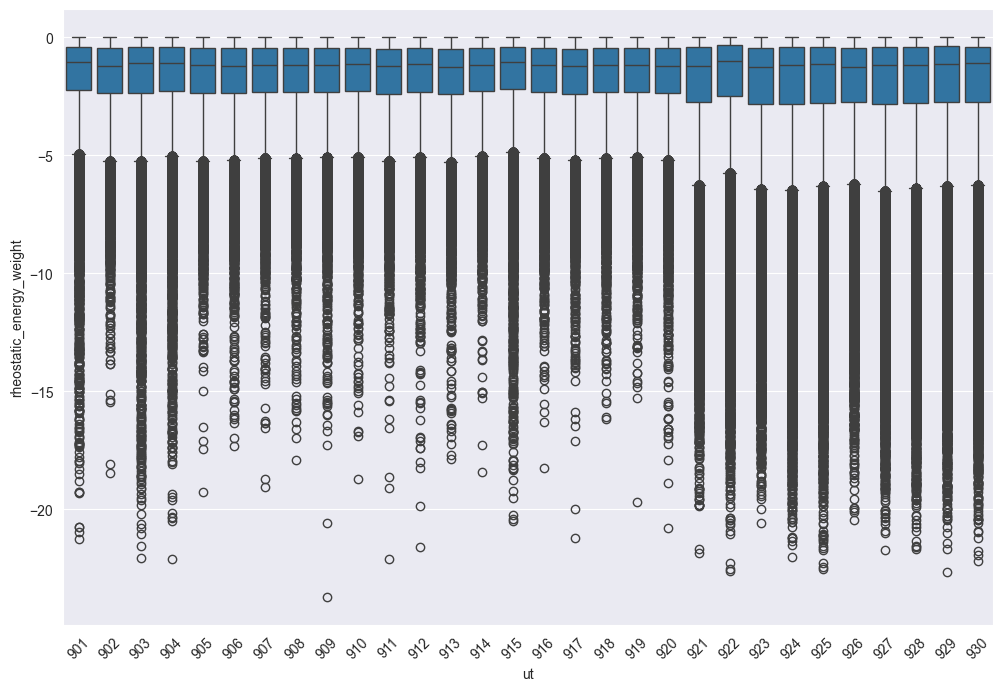

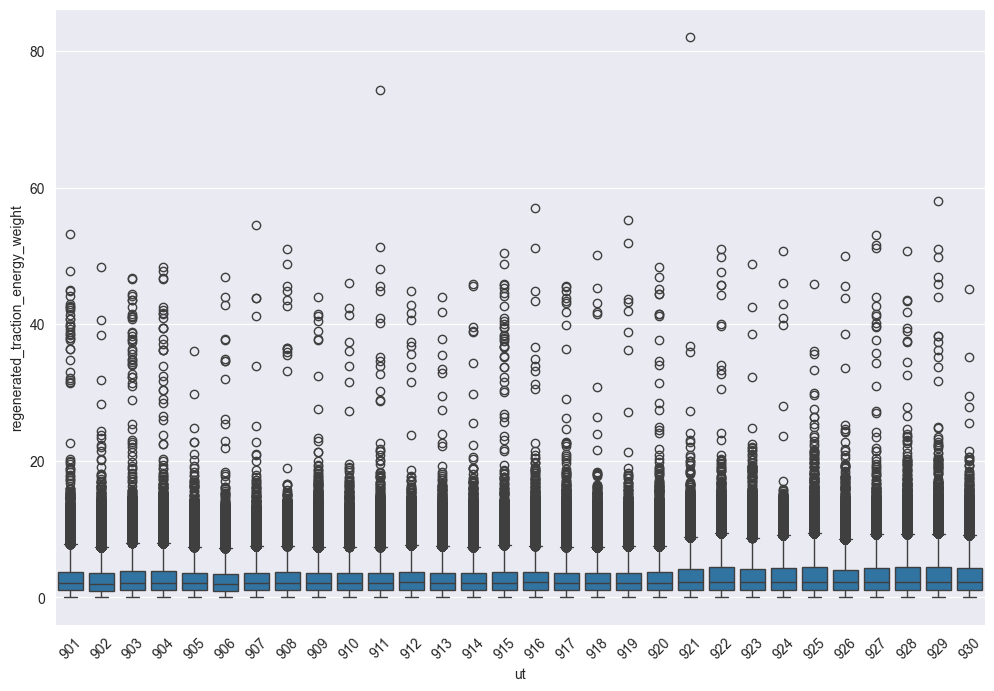

In [59]:
# Plots of consumption by train, for different energy types
train_avg_energy = df.groupby('ut')['net_energy_consumed_by_UT_weight'].mean().reset_index()
train_avg_energy.columns = ['ut', 'avg_energy_consumed']

plt.figure(figsize=(12, 8))
sns.boxplot(x='ut', y='net_energy_consumed_by_UT_weight', data=df)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='ut', y='auxiliary_energy_consumed_weight', data=df)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='ut', y='traction_energy_weight', data=df)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='ut', y='rheostatic_energy_weight', data=df)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='ut', y='regenerated_traction_energy_weight', data=df)
plt.xticks(rotation=45)
plt.show()

    train  number_of_routes
0     901               163
1     902               163
2     903               163
3     904               165
4     905               139
5     906               164
6     907               163
7     908               163
8     909               163
9     910               165
10    911               163
11    912               163
12    913               163
13    914               163
14    915               165
15    916               163
16    917               163
17    918               163
18    919               163
19    920               163
20    921               164
21    922               165
22    923               165
23    924               165
24    925               164
25    926               158
26    927               165
27    928               165
28    929               163
29    930               165


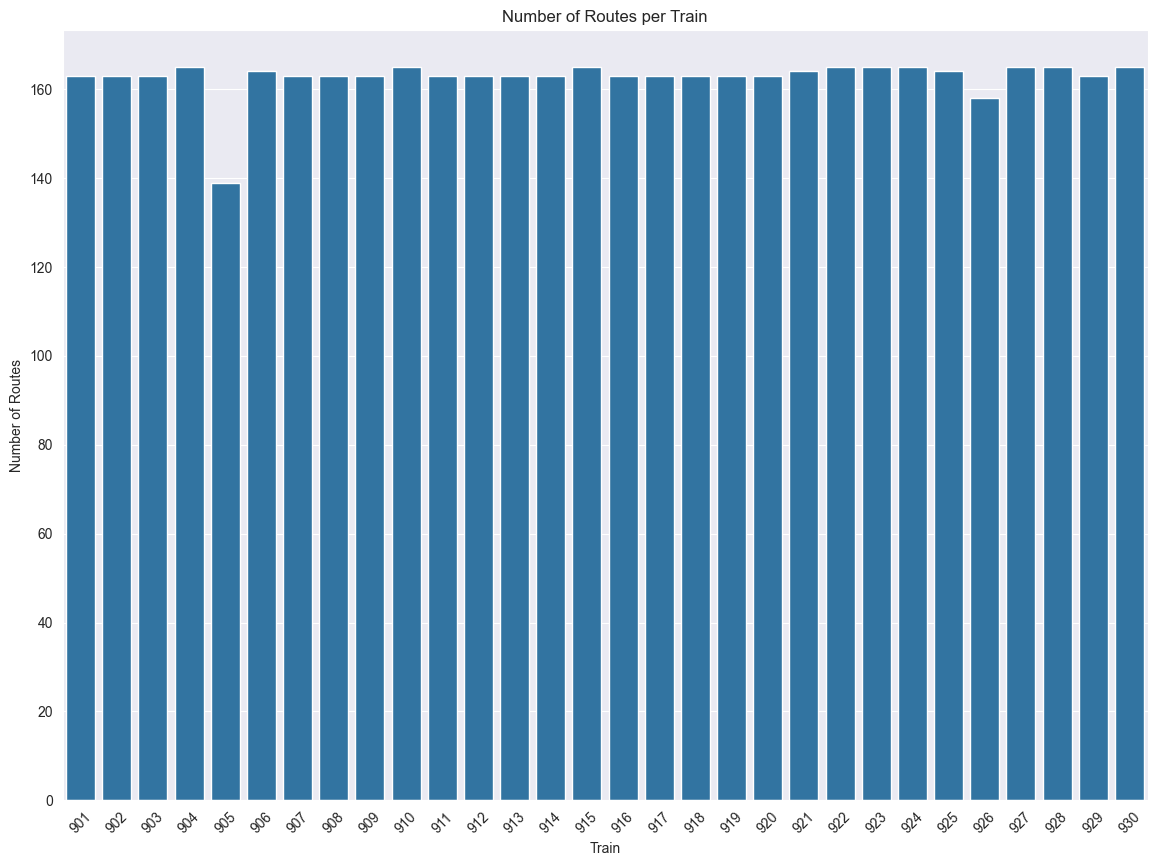

In [60]:
# Calculate the number of unique routes
route_counts = df.groupby(['ut', 'current_station', 'next_station']).size().reset_index(name='route_count')

# Aggregate the number of routes per train
routes_per_train = route_counts.groupby('ut')['route_count'].count().reset_index()
routes_per_train.columns = ['train', 'number_of_routes']
print(routes_per_train)

# Plot the number of trips per train
plt.figure(figsize=(14, 10))
sns.barplot(x='train', y='number_of_routes', data=routes_per_train)
plt.title('Number of Routes per Train')
plt.xlabel('Train')
plt.ylabel('Number of Routes')
plt.xticks(rotation=45)
plt.show()

    train  number_of_trips
0     930           118734
1     923           117876
2     929           117827
3     905           115042
4     911           113444
5     912           112969
6     907           111384
7     928           109450
8     909           109302
9     921           108551
10    918           108225
11    906           107663
12    919           107019
13    910           106275
14    920           106263
15    925           106032
16    922           105824
17    917           104759
18    927           104377
19    924           104194
20    926           104075
21    914           103587
22    916           102726
23    913           100255
24    908            99533
25    902            97800
26    915            94034
27    901            90969
28    904            90399
29    903            82721
    train  number_of_trips
0     924               63
1     930               39
2     922               39
3     920               35
4     928               33
5

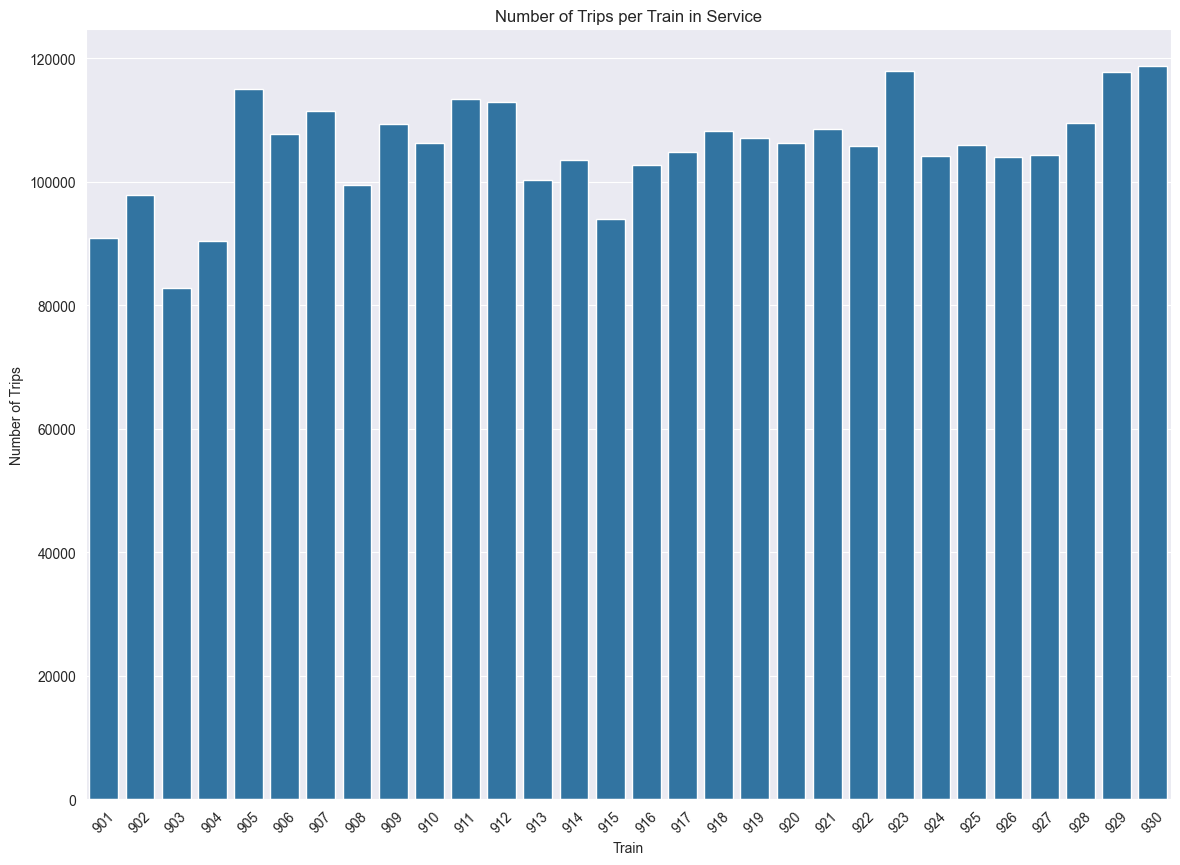

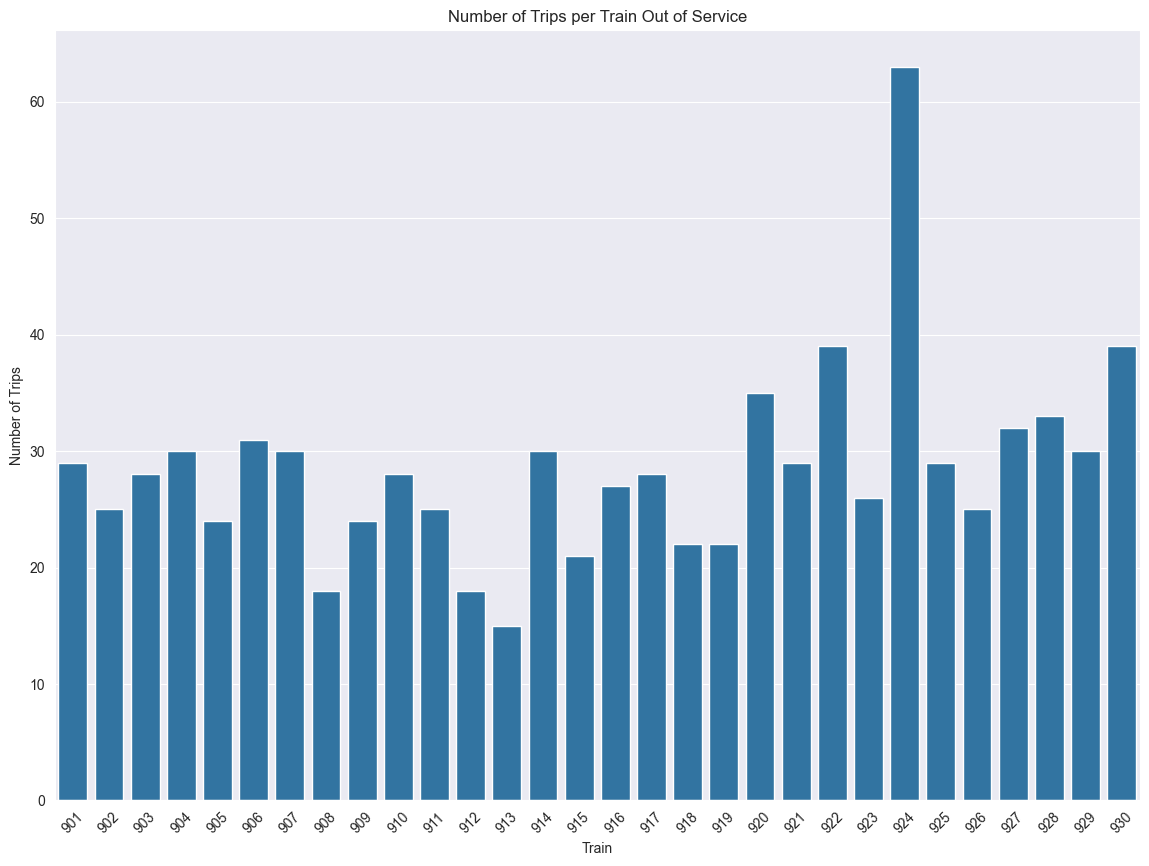

In [61]:
# Establish the number of trains in service and out of service
in_service_trains = df[df['in_service'] == 1]
out_of_service_trains = df[df['in_service'] == 0]

# Calculate the number of trips for each train in service
in_service_trip_counts = in_service_trains['ut'].value_counts().reset_index()
in_service_trip_counts.columns = ['train', 'number_of_trips']
print(in_service_trip_counts)

# Calculate the number of trips for each train out of service
out_of_service_trip_counts = out_of_service_trains['ut'].value_counts().reset_index()
out_of_service_trip_counts.columns = ['train', 'number_of_trips']
print(out_of_service_trip_counts)

# Plot the number of trips per train in service
plt.figure(figsize=(14, 10))
sns.barplot(x='train', y='number_of_trips', data=in_service_trip_counts)
plt.title('Number of Trips per Train in Service')
plt.xlabel('Train')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

# Plot the number of trips per train out of service
plt.figure(figsize=(14, 10))
sns.barplot(x='train', y='number_of_trips', data=out_of_service_trip_counts)
plt.title('Number of Trips per Train Out of Service')
plt.xlabel('Train')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

# DETECTING OUTLIERS IN ENERGY CONSUMPTION

In [62]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV

# Establish outlier detection criteria per type of energy consumption
outlier_columns = ['net_energy_consumed_by_UT_weight', 'auxiliary_energy_consumed_weight', 'traction_energy_weight', 'rheostatic_energy_weight', 'regenerated_traction_energy_weight']

# Define a smaller parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100],
    'max_samples': ['auto'],
    'contamination': [0.05],
    'random_state': [42]
}

# Set up GridSearchCV with reduced cross-validation folds
iso_forest = IsolationForest()
grid_search = GridSearchCV(estimator=iso_forest, param_grid=param_grid, scoring='precision', cv=3, n_jobs=-1)

# Fit the model with GridSearchCV for each type of energy consumption
for column in outlier_columns:
    # Sample the data for fitting, excluding NaN values
    non_null_data = df[column].dropna()
    sample_size = min(10000, len(non_null_data))
    energy_consumption_sample = non_null_data.sample(sample_size, random_state=42).values.reshape(-1, 1)
    
    grid_search.fit(energy_consumption_sample, np.zeros(energy_consumption_sample.shape[0]))
    best_iso_forest = grid_search.best_estimator_
    
    # Predict on the full dataset, handling NaN values
    energy_consumption_full = df[column].values.reshape(-1, 1)
    
    # Create a Series to hold the predictions
    predictions = pd.Series(index=df.index, dtype=float)
    
    # Predict only on non-NaN values
    non_nan_mask = ~np.isnan(energy_consumption_full.flatten())
    predictions[non_nan_mask] = best_iso_forest.predict(energy_consumption_full[non_nan_mask])
    
    # Assign NaN to the positions where the original data was NaN
    predictions[~non_nan_mask] = np.nan
    
    # Assign the predictions to the DataFrame
    df[f'anomaly_{column}'] = predictions
    
    print(f"Anomaly detection completed for {column}")

# Display the first few rows of the dataset with the new columns
print(df[['net_energy_consumed_by_UT_weight', 'anomaly_net_energy_consumed_by_UT_weight']].head())

# Print the best parameters for each column
for column in outlier_columns:
    print(f"Best parameters for {column}: {grid_search.best_params_}")

# Print summary of anomaly detection results
for column in outlier_columns:
    anomaly_column = f'anomaly_{column}'
    anomaly_count = (df[anomaly_column] == -1).sum()
    total_count = df[anomaly_column].count()
    anomaly_percentage = (anomaly_count / total_count) * 100
    print(f"{column}: {anomaly_count} anomalies detected out of {total_count} non-null values ({anomaly_percentage:.2f}%)")

C:\Users\MARIO\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


Anomaly detection completed for net_energy_consumed_by_UT_weight


C:\Users\MARIO\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


Anomaly detection completed for auxiliary_energy_consumed_weight


C:\Users\MARIO\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


Anomaly detection completed for traction_energy_weight


C:\Users\MARIO\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


Anomaly detection completed for rheostatic_energy_weight


C:\Users\MARIO\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


Anomaly detection completed for regenerated_traction_energy_weight
   net_energy_consumed_by_UT_weight  anomaly_net_energy_consumed_by_UT_weight
0                          2.958499                                       1.0
1                         11.244754                                       1.0
2                         18.333651                                       1.0
3                          4.905837                                       1.0
4                          2.874232                                       1.0
Best parameters for net_energy_consumed_by_UT_weight: {'contamination': 0.05, 'max_samples': 'auto', 'n_estimators': 100, 'random_state': 42}
Best parameters for auxiliary_energy_consumed_weight: {'contamination': 0.05, 'max_samples': 'auto', 'n_estimators': 100, 'random_state': 42}
Best parameters for traction_energy_weight: {'contamination': 0.05, 'max_samples': 'auto', 'n_estimators': 100, 'random_state': 42}
Best parameters for rheostatic_energy_weight: {'c

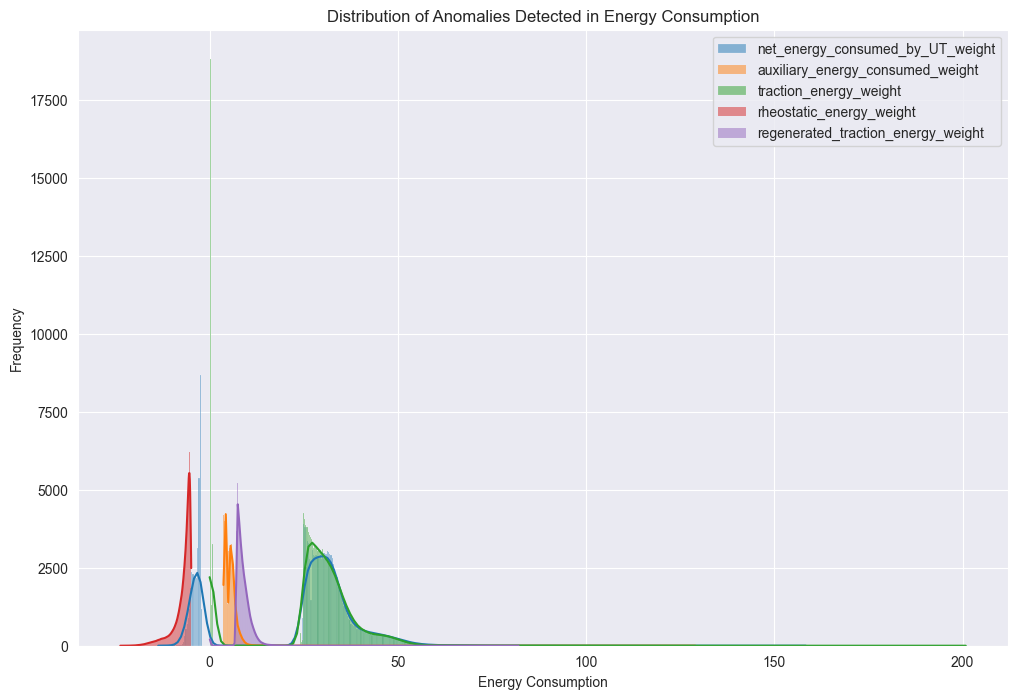

In [63]:
# Plotting the distribution of anomalies detected in energy consumption for each type
plt.figure(figsize=(12, 8))
for column in outlier_columns:
    sns.histplot(df[df[f'anomaly_{column}'] == -1][column], kde=True, label=column, alpha=0.5)
    
plt.title('Distribution of Anomalies Detected in Energy Consumption')
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# DETECTING OUTLIERS IN OUT-OF-SERVICE TRAINS

In [64]:
# Establish outlier detection criteria for out-of-service trains
out_of_service_columns = ['net_energy_consumed_by_UT_weight', 'auxiliary_energy_consumed_weight', 'traction_energy_weight', 'rheostatic_energy_weight', 'regenerated_traction_energy_weight']

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_samples': ['auto', 0.5],
    'contamination': [0.01, 0.05],
    'random_state': [42]
}

# Set up GridSearchCV
iso_forest = IsolationForest()
grid_search = GridSearchCV(estimator=iso_forest, param_grid=param_grid, scoring='precision', cv=5, n_jobs=-1)

# Fit the model with GridSearchCV for each type of energy consumption
for column in out_of_service_columns:
    out_of_service_data = df[df['in_service'] == 0]
    out_of_service_energy = out_of_service_data[column].dropna().values.reshape(-1, 1)
    grid_search.fit(out_of_service_energy, np.zeros(out_of_service_energy.shape[0]))
    best_iso_forest = grid_search.best_estimator_
    out_of_service_data[f'anomaly_{column}'] = best_iso_forest.fit_predict(out_of_service_energy)
    
# Display the first few rows of the dataset with the new columns
print(out_of_service_data.head())

C:\Users\MARIO\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\MARIO\AppData\Local\Temp\ipykernel_5076\2043712493.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_of_service_data[f'anomaly_{column}'] = best_iso_forest.fit_predict(out_of_service_energy)
C:\Users\MARIO\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\MARIO\AppData\Local\Temp\ipykernel_5076\2043712493.py:22: SettingWithCopyWarning: 
A value is trying t

        ut                start_date                  end_date  \
7281   920 2023-01-05 06:43:47+00:00 2023-01-05 07:40:48+00:00   
12626  926 2023-01-08 08:40:27+00:00 2023-01-08 09:58:24+00:00   
13706  926 2023-01-09 04:59:07+00:00 2023-01-09 05:49:27+00:00   
16030  902 2023-01-10 06:07:29+00:00 2023-01-10 06:19:26+00:00   
20433  915 2023-01-12 05:21:25+00:00 2023-01-12 05:35:32+00:00   

      current_station next_station  current_station_code  next_station_code  \
7281          Lasarte    Errekalde                    94                 62   
12626  Donostia-Amara     Lugaritz                    64                 97   
13706          Lezama      La Cruz                    91                 90   
16030          Zumaia      Zarautz                    57                 58   
20433        Oiartzun     Fanderia                    71                 98   

            client_line  track  tiempo_marcha  ...  traction_energy_weight  \
7281      Ramal Lasarte      2          160.0  ...

C:\Users\MARIO\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\MARIO\AppData\Local\Temp\ipykernel_5076\2043712493.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_of_service_data[f'anomaly_{column}'] = best_iso_forest.fit_predict(out_of_service_energy)


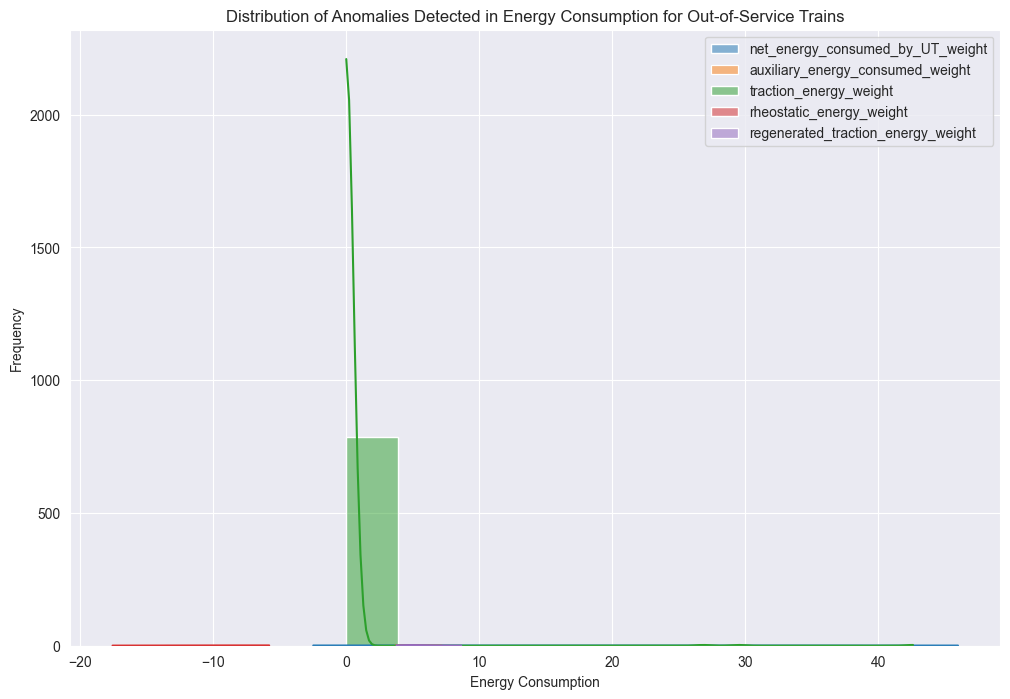

In [65]:
# Plotting the distribution of anomalies detected in energy consumption for out-of-service trains
plt.figure(figsize=(12, 8))
for column in out_of_service_columns:
    sns.histplot(out_of_service_data[out_of_service_data[f'anomaly_{column}'] == -1][column], kde=True, label=column, alpha=0.5)

plt.title('Distribution of Anomalies Detected in Energy Consumption for Out-of-Service Trains')
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# DETECTING OUTLIERS IN ENERGY CONSUMPTION PER KILOMETRE

In [66]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV

# Establish outlier detection criteria for energy consumption per kilometre
df['energy_per_km'] = df['net_energy_consumed_by_UT_weight'] / df['kilometres']

# Select the energy per km column
energy_per_km = df['energy_per_km'].dropna()

# Define a smaller parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100],
    'max_samples': ['auto'],
    'contamination': [0.05],
    'random_state': [42]
}

# Set up GridSearchCV with reduced cross-validation folds
iso_forest = IsolationForest()
grid_search = GridSearchCV(estimator=iso_forest, param_grid=param_grid, scoring='precision', cv=3, n_jobs=-1)

# Sample the data for fitting
sample_size = min(10000, len(energy_per_km))
energy_per_km_sample = energy_per_km.sample(sample_size, random_state=42).values.reshape(-1, 1)

# Fit the model with GridSearchCV
grid_search.fit(energy_per_km_sample, np.zeros(energy_per_km_sample.shape[0]))

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator to detect anomalies
best_iso_forest = grid_search.best_estimator_

# Predict on the full dataset
predictions = pd.Series(index=df.index, dtype=float)
non_nan_mask = ~df['energy_per_km'].isna()
predictions[non_nan_mask] = best_iso_forest.predict(df.loc[non_nan_mask, 'energy_per_km'].values.reshape(-1, 1))
df['anomaly_energy_per_km'] = predictions

# Identify outliers
outliers_energy_per_km = df[df['anomaly_energy_per_km'] == -1]

# Count the number of outliers
num_outliers_energy_per_km = outliers_energy_per_km.shape[0]
print(f'Number of energy per km outliers: {num_outliers_energy_per_km}')

# Display details of outliers (limited to first 20 for brevity)
print("Details of energy per km outliers (first 20):")
print(outliers_energy_per_km[['ut', 'kilometres', 'net_energy_consumed_by_UT_weight', 'energy_per_km']].head(20))

# Display the average energy consumption per kilometre for each train
train_avg_energy_per_km = df.groupby('ut')['energy_per_km'].mean().sort_values(ascending=False).reset_index()
train_avg_energy_per_km.columns = ['ut', 'avg_energy_per_km']
print("\nAverage energy per km for each train (top 10):")
print(train_avg_energy_per_km.head(10))

# Calculate and display the overall average energy per km
overall_avg_energy_per_km = df['energy_per_km'].mean()
print(f"\nOverall average energy per km: {overall_avg_energy_per_km:.2f}")

# Calculate percentage of trips that are anomalous
total_trips = df['energy_per_km'].count()
anomaly_percentage = (num_outliers_energy_per_km / total_trips) * 100
print(f"\nPercentage of anomalous trips: {anomaly_percentage:.2f}%")

C:\Users\MARIO\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


Best parameters found:  {'contamination': 0.05, 'max_samples': 'auto', 'n_estimators': 100, 'random_state': 42}
Number of energy per km outliers: 157410
Details of energy per km outliers (first 20):
      ut  kilometres  net_energy_consumed_by_UT_weight  energy_per_km
1    927        1.03                         11.244754      10.917237
2    927        1.40                         18.333651      13.095465
7    927        1.00                         15.640447      15.640447
10   927        0.69                          9.195576      13.326921
68   910        0.84                         -2.736895      -3.258208
145  930        0.01                          0.256108      25.610820
148  930        1.38                         18.380908      13.319498
194  930        1.03                         11.508846      11.173637
206  925        1.39                         17.713792      12.743735
208  919        1.16                         12.583735      10.848047
236  925        0.69           

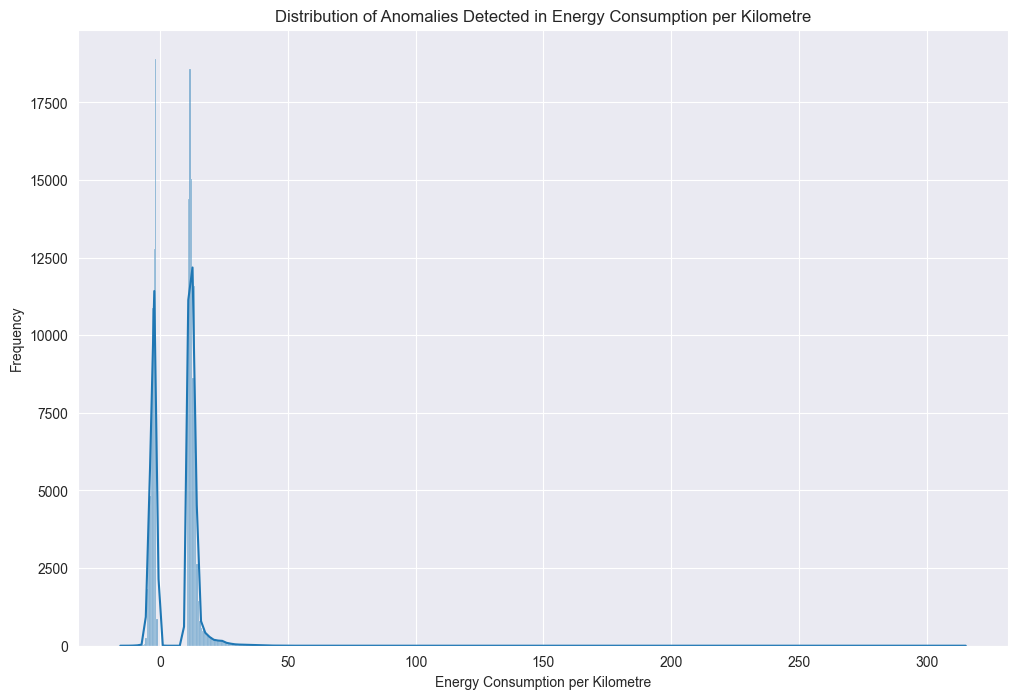

In [67]:
# Plotting the distribution of anomalies detected in energy consumption per kilometre
plt.figure(figsize=(12, 8))
sns.histplot(df[df['anomaly_energy_per_km'] == -1]['energy_per_km'], kde=True)
plt.title('Distribution of Anomalies Detected in Energy Consumption per Kilometre')
plt.xlabel('Energy Consumption per Kilometre')
plt.ylabel('Frequency')
plt.show()

# DETECTING OUTLIERS IN ENERGY CONSUMPTION BY ROUTE

In [68]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV

# Establish outlier detection criteria for energy consumption by route
df['net_energy_consumed_by_UT_weight'] = df['net_energy_consumed_by_UT_weight'].abs()
df['net_energy_consumed_by_UT_weight'] = df['net_energy_consumed_by_UT_weight'].replace([np.inf, -np.inf], np.nan)

# Select the energy consumption column
energy_consumption = df['net_energy_consumed_by_UT_weight'].dropna().values.reshape(-1, 1)

# Define a smaller parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100],
    'max_samples': ['auto'],
    'contamination': [0.05],
    'random_state': [42]
}

# Set up GridSearchCV with reduced cross-validation folds
iso_forest = IsolationForest()
grid_search = GridSearchCV(estimator=iso_forest, param_grid=param_grid, scoring='precision', cv=3, n_jobs=-1)

# Sample the data for fitting
sample_size = min(10000, len(energy_consumption))
energy_consumption_sample = np.random.choice(energy_consumption.flatten(), size=sample_size, replace=False).reshape(-1, 1)

# Fit the model with GridSearchCV
grid_search.fit(energy_consumption_sample, np.zeros(energy_consumption_sample.shape[0]))

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator to detect anomalies
best_iso_forest = grid_search.best_estimator_
df['anomaly_energy_consumption'] = pd.Series(best_iso_forest.fit_predict(energy_consumption), index=df.dropna(subset=['net_energy_consumed_by_UT_weight']).index)

# Identify outliers
outliers_energy_consumption = df[df['anomaly_energy_consumption'] == -1]

# Count the number of outliers
num_outliers_energy_consumption = outliers_energy_consumption.shape[0]
print(f'Number of energy consumption outliers: {num_outliers_energy_consumption}')

# Display details of outliers (limited to first 20 for brevity)
print("Details of energy consumption outliers (first 20):")
print(outliers_energy_consumption[['ut', 'current_station', 'next_station', 'net_energy_consumed_by_UT_weight']].head(20))

# Display the average energy consumption for each route (current_station, next_station)
route_avg_energy = df.groupby(['current_station', 'next_station'])['net_energy_consumed_by_UT_weight'].mean().reset_index()
route_avg_energy.columns = ['current_station', 'next_station', 'avg_route_energy']
print("\nAverage energy consumption by route (top 20):")
print(route_avg_energy.sort_values('avg_route_energy', ascending=False).head(20))

# Calculate and display the overall average energy consumption
overall_avg_energy = df['net_energy_consumed_by_UT_weight'].mean()
print(f"\nOverall average energy consumption: {overall_avg_energy:.2f}")

# Calculate percentage of routes that are anomalous
total_routes = df['net_energy_consumed_by_UT_weight'].count()
anomaly_percentage = (num_outliers_energy_consumption / total_routes) * 100
print(f"\nPercentage of anomalous routes: {anomaly_percentage:.2f}%")

C:\Users\MARIO\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


Best parameters found:  {'contamination': 0.05, 'max_samples': 'auto', 'n_estimators': 100, 'random_state': 42}
Number of energy consumption outliers: 157795
Details of energy consumption outliers (first 20):
      ut current_station       next_station  net_energy_consumed_by_UT_weight
35   930           Arroa               Deba                         41.414950
36   927            Euba            Durango                         24.313776
41   927           Traña             Berriz                         24.647442
60   930        Elgoibar            Azitain                         34.260406
89   930           Ermua  Zaldibar Apeadero                         38.270411
127  927          Zumaia            Zarautz                         32.471686
143  927        Aia-Orio            Usurbil                         30.219546
153  927         Usurbil          Errekalde                         26.153714
203  921           Eibar           Ardantza                          0.006532
217  927   

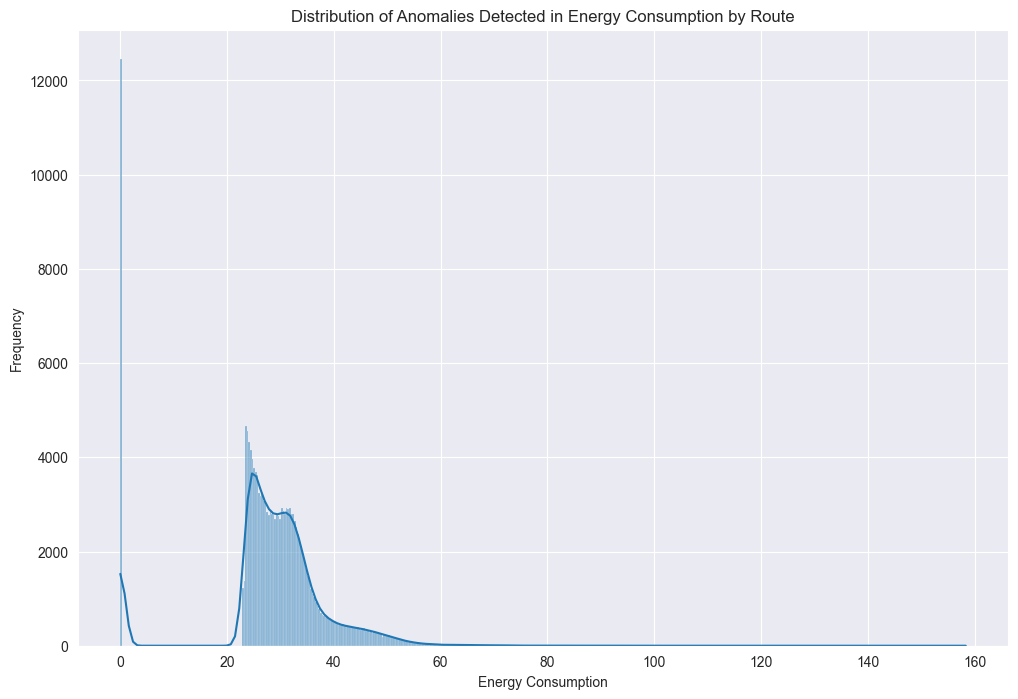


Top 10 routes with highest number of anomalies:
current_station  next_station     
Aia-Orio         Usurbil              16488
Usurbil          Errekalde            15059
Ermua            Zaldibar Apeadero    13877
Elgoibar         Azitain              12435
Deba             Mendaro              11441
                 Arroa                10993
Arroa            Deba                 10723
Usurbil          Aia-Orio              8797
Mendaro          Toletxegain           7399
Zarautz          Zumaia                6982
dtype: int64


In [69]:
# Plotting the distribution of anomalies detected in energy consumption by route
plt.figure(figsize=(12, 8))
sns.histplot(df[df['anomaly_energy_consumption'] == -1]['net_energy_consumed_by_UT_weight'], kde=True)
plt.title('Distribution of Anomalies Detected in Energy Consumption by Route')
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.show()

# Display the top 10 routes with highest number of anomalies
print("\nTop 10 routes with highest number of anomalies:")
print(outliers_energy_consumption.groupby(['current_station', 'next_station']).size().sort_values(ascending=False).head(10))

# DETECTING OUTLIERS IN ENERGY CONSUMPTION BY SEASON (extra, if we have time)

In [70]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest

# Establish outlier detection criteria for energy consumption by season
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['start_date'].apply(get_season)

# Group by season and calculate mean energy consumption
season_groups = df.groupby('season')['net_energy_consumed_by_UT_weight'].mean().reset_index()
season_groups['season_energy'] = season_groups['net_energy_consumed_by_UT_weight']

# Select the seasonal energy consumption column
season_energy = season_groups['season_energy'].values.reshape(-1, 1)

# Since we have only 4 data points (one per season), we'll use a simple IsolationForest without GridSearchCV
iso_forest = IsolationForest(n_estimators=100, contamination=0.25, random_state=42)

# Fit the model and predict
season_groups['anomaly_season_energy'] = iso_forest.fit_predict(season_energy)

# Identify outliers
outliers_season_energy = season_groups[season_groups['anomaly_season_energy'] == -1]

# Count the number of outliers
num_outliers_season_energy = outliers_season_energy.shape[0]
print(f'Number of seasonal energy outliers: {num_outliers_season_energy}')

# Display details of all seasons and their energy consumption
print("\nSeasonal energy consumption:")
print(season_groups[['season', 'season_energy', 'anomaly_season_energy']])

# Display details of outliers (if any)
if num_outliers_season_energy > 0:
    print("\nDetails of seasonal energy outliers:")
    print(outliers_season_energy[['season', 'season_energy']])
else:
    print("\nNo seasonal energy outliers detected.")

# Calculate and display additional statistics
print(f"\nOverall average energy consumption: {season_groups['season_energy'].mean():.2f}")
print(f"Season with highest energy consumption: {season_groups.loc[season_groups['season_energy'].idxmax(), 'season']}")
print(f"Season with lowest energy consumption: {season_groups.loc[season_groups['season_energy'].idxmin(), 'season']}")

Number of seasonal energy outliers: 1

Seasonal energy consumption:
   season  season_energy  anomaly_season_energy
0  Autumn       7.869306                      1
1  Spring       7.975565                      1
2  Summer       7.805433                      1
3  Winter       8.068962                     -1

Details of seasonal energy outliers:
   season  season_energy
3  Winter       8.068962

Overall average energy consumption: 7.93
Season with highest energy consumption: Winter
Season with lowest energy consumption: Summer


# Showing trains that consistently have anomalous energy consumption in multiple categories

In [71]:
# Identify trains with consistent anomalies in multiple categories
consistent_anomalies = df[(df['anomaly_net_energy_consumed_by_UT_weight'] == -1) & (df['anomaly_auxiliary_energy_consumed_weight'] == -1) & (df['anomaly_traction_energy_weight'] == -1) & (df['anomaly_rheostatic_energy_weight'] == -1) & (df['anomaly_regenerated_traction_energy_weight'] == -1)]

# Count the number of trains with consistent anomalies
num_consistent_anomalies = consistent_anomalies['ut'].nunique()
print(f'Number of trains with consistent anomalies: {num_consistent_anomalies}')

# Display details of trains with consistent anomalies
print("Details of trains with consistent anomalies:")
print(consistent_anomalies[['ut', 'net_energy_consumed_by_UT_weight', 'auxiliary_energy_consumed_weight', 'traction_energy_weight', 'rheostatic_energy_weight', 'regenerated_traction_energy_weight']])

# Display the average energy consumption for each train with consistent anomalies
train_avg_energy_consistent = consistent_anomalies.groupby('ut')['net_energy_consumed_by_UT_weight'].mean().reset_index()
train_avg_energy_consistent.columns = ['ut', 'avg_energy_consumed']
print(train_avg_energy_consistent)

# Display the average energy consumption per kilometre for each train with consistent anomalies
train_avg_energy_per_km_consistent = consistent_anomalies.groupby('ut')['energy_per_km'].mean().reset_index()
train_avg_energy_per_km_consistent.columns = ['ut', 'avg_energy_per_km']
print(train_avg_energy_per_km_consistent)

# Display the average energy consumption for each route (current_station, next_station) for trains with consistent anomalies
route_avg_energy_consistent = consistent_anomalies.groupby(['current_station', 'next_station'])['net_energy_consumed_by_UT_weight'].mean().reset_index()
route_avg_energy_consistent.columns = ['current_station', 'next_station', 'avg_route_energy']
print(route_avg_energy_consistent)

# Display the average energy consumption for each season for trains with consistent anomalies
season_avg_energy_consistent = consistent_anomalies.groupby('season')['net_energy_consumed_by_UT_weight'].mean().reset_index()
season_avg_energy_consistent.columns = ['season', 'avg_season_energy']
print(season_avg_energy_consistent)

Number of trains with consistent anomalies: 30
Details of trains with consistent anomalies:
          ut  net_energy_consumed_by_UT_weight  \
813      925                         42.529170   
1063     917                         34.634265   
1195     921                         45.494845   
1199     904                         26.231582   
1499     917                         30.426108   
...      ...                               ...   
3161598  926                         29.476164   
3161613  921                         45.006284   
3161750  923                         44.268127   
3161886  930                         44.068567   
3161988  923                         38.326953   

         auxiliary_energy_consumed_weight  traction_energy_weight  \
813                              6.136082               45.678982   
1063                             6.137190               37.294473   
1195                             6.435209               47.795123   
1199                           

     ut  num_anomalies
0   923           1356
1   929           1319
2   928           1311
3   922           1233
4   925           1223
5   921           1204
6   930           1197
7   927           1162
8   926           1054
9   924            988
10  916            353
11  918            305
12  919            248
13  920            243
14  917            237
15  903            122
16  901             95
17  912             95
18  913             92
19  911             79
20  908             78
21  907             78
22  904             73
23  915             72
24  909             71
25  905             69
26  914             64
27  910             58
28  906             49
29  902             48

Top 10 trains with consistent anomalies:
    ut  num_anomalies
0  923           1356
1  929           1319
2  928           1311
3  922           1233
4  925           1223
5  921           1204
6  930           1197
7  927           1162
8  926           1054
9  924            988


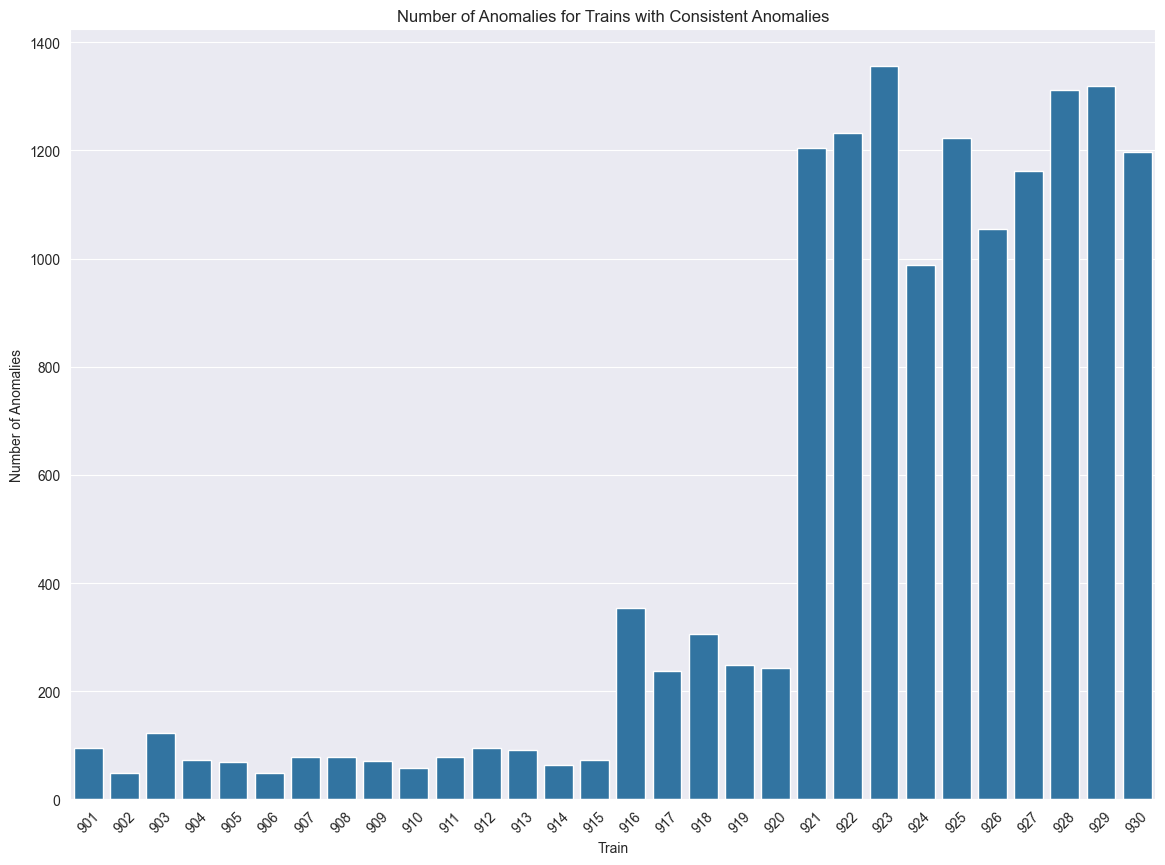

In [85]:
# Printing the identifiers of trains with consistent anomalies, ranked by the number of anomalies
consistent_anomalies_count = consistent_anomalies['ut'].value_counts().reset_index()
consistent_anomalies_count.columns = ['ut', 'num_anomalies']
print(consistent_anomalies_count)

# Display the top 10 trains with consistent anomalies
print("\nTop 10 trains with consistent anomalies:")
print(consistent_anomalies_count.head(10))

# Plot the number of anomalies for each train with consistent anomalies
plt.figure(figsize=(14, 10))
sns.barplot(x='ut', y='num_anomalies', data=consistent_anomalies_count)
plt.title('Number of Anomalies for Trains with Consistent Anomalies')
plt.xlabel('Train')
plt.ylabel('Number of Anomalies')
plt.xticks(rotation=45)
plt.show()

# Defending ourselves

     ut  number_of_drivers
0   901                370
1   902                297
2   903                384
3   904                388
4   905                277
5   906                292
6   907                318
7   908                309
8   909                309
9   910                306
10  911                309
11  912                297
12  913                300
13  914                281
14  915                375
15  916                286
16  917                288
17  918                288
18  919                277
19  920                322
20  921                392
21  922                403
22  923                389
23  924                393
24  925                424
25  926                387
26  927                401
27  928                430
28  929                411
29  930                445
Average number of drivers per train: 344.93333333333334


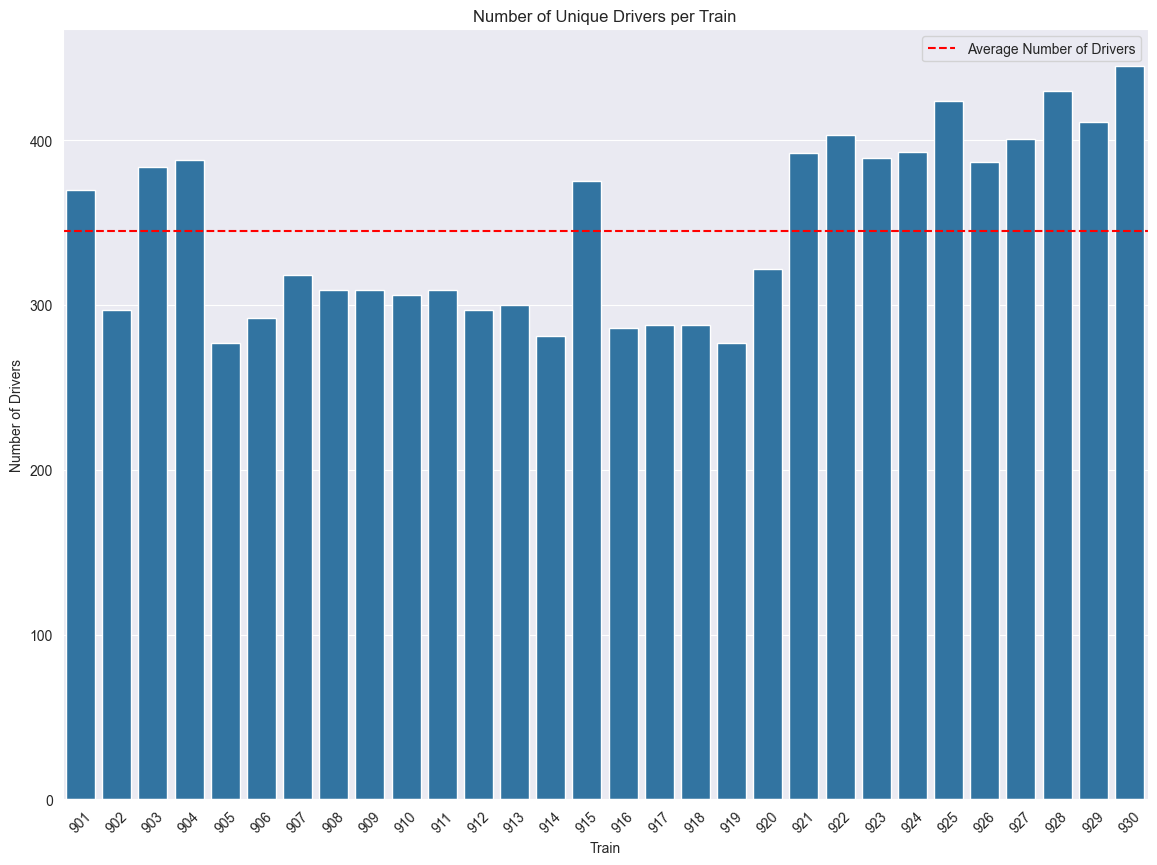

In [72]:
# Identifying how many unique drivers has had each train
unique_drivers = df.groupby('ut')['si_siv_ndriver_def'].nunique().reset_index()
unique_drivers.columns = ['ut', 'number_of_drivers']
print(unique_drivers)

# Calculate the average number of drivers per train
avg_num_drivers = unique_drivers['number_of_drivers'].mean()
print(f'Average number of drivers per train: {avg_num_drivers}')

# Plot the number of unique drivers for each train and the average number of drivers
plt.figure(figsize=(14, 10))
sns.barplot(x='ut', y='number_of_drivers', data=unique_drivers)
plt.axhline(avg_num_drivers, color='red', linestyle='--', label='Average Number of Drivers')
plt.title('Number of Unique Drivers per Train')
plt.xlabel('Train')
plt.ylabel('Number of Drivers')
plt.xticks(rotation=45)
plt.legend()
plt.show()

     ut  number_of_trips
0   901            90998
1   902            97825
2   903            82749
3   904            90429
4   905           115066
5   906           107694
6   907           111414
7   908            99551
8   909           109326
9   910           106303
10  911           113469
11  912           112987
12  913           100270
13  914           103617
14  915            94055
15  916           102753
16  917           104787
17  918           108247
18  919           107041
19  920           106298
20  921           108580
21  922           105863
22  923           117902
23  924           104257
24  925           106061
25  926           104100
26  927           104409
27  928           109483
28  929           117857
29  930           118773
Average number of trips per train: 105405.46666666666


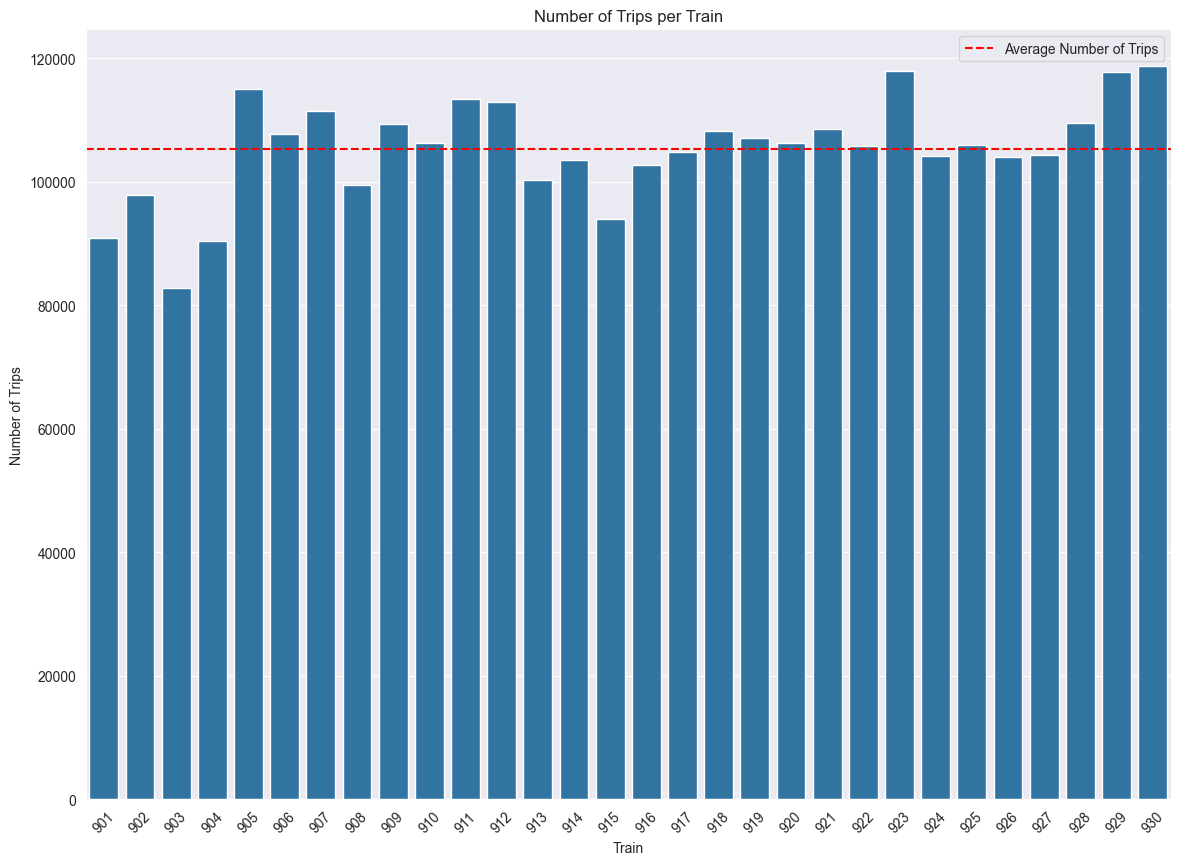

In [73]:
# Identifying how many trips has each train made
trip_counts = df.groupby('ut')['start_date'].count().reset_index()
trip_counts.columns = ['ut', 'number_of_trips']
print(trip_counts)

# Calculate the average number of trips per train
avg_num_trips = trip_counts['number_of_trips'].mean()
print(f'Average number of trips per train: {avg_num_trips}')

# Plot the number of trips for each train and the average number of trips
plt.figure(figsize=(14, 10))
sns.barplot(x='ut', y='number_of_trips', data=trip_counts)
plt.axhline(avg_num_trips, color='red', linestyle='--', label='Average Number of Trips')
plt.title('Number of Trips per Train')
plt.xlabel('Train')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# How much energy could have been saved 

Total potential energy savings: 3131.98 MWh


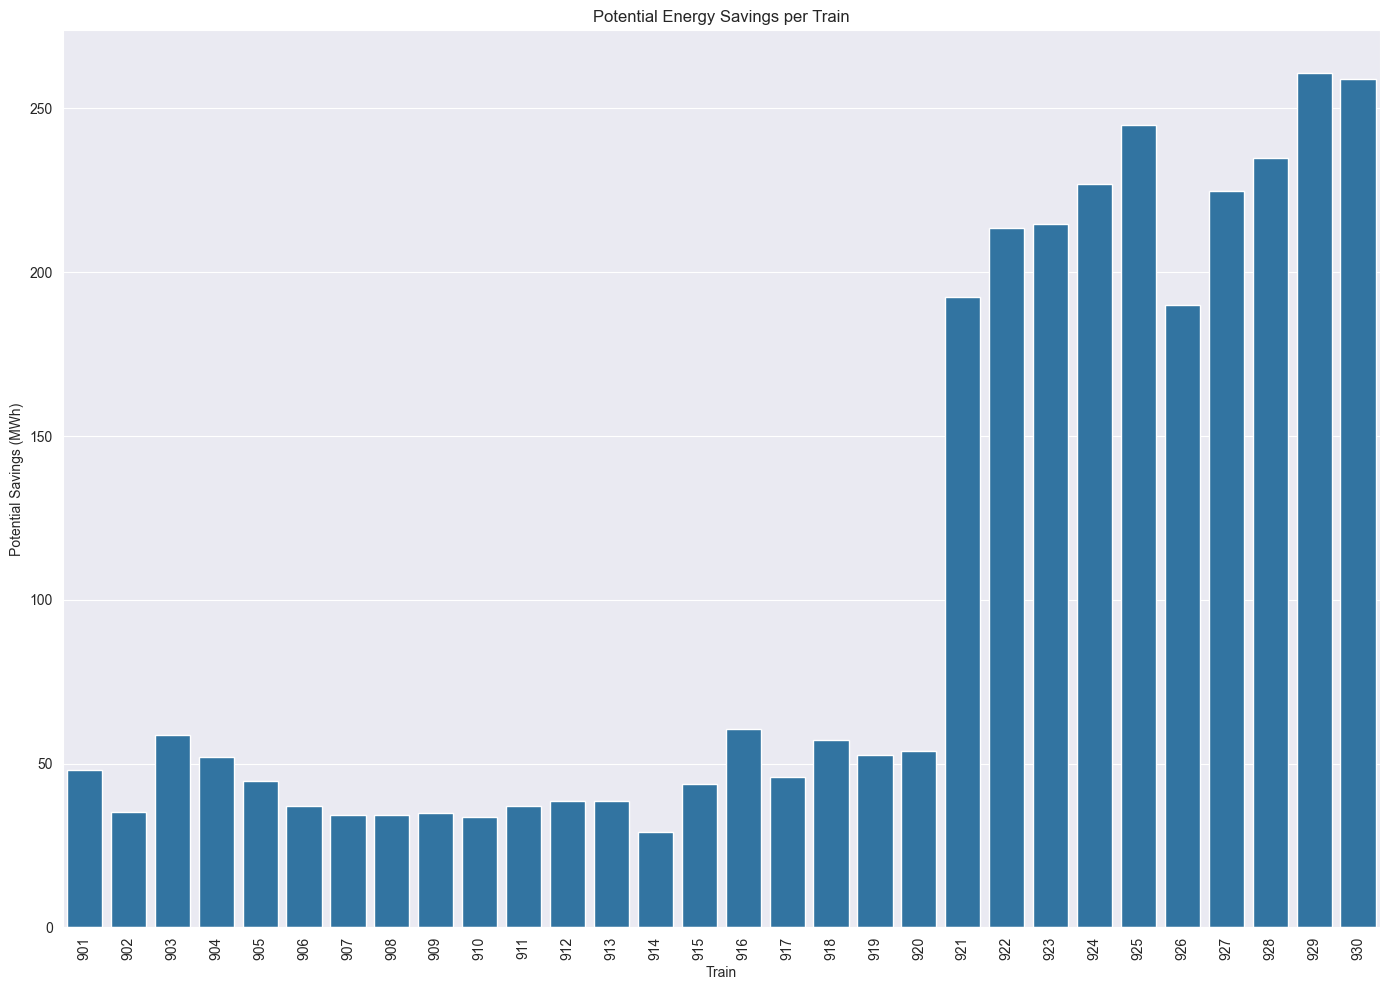


Top 10 trains with highest potential savings:
     ut  net_energy_consumed_by_UT_weight  normal_energy  potential_savings
28  929                      1.189468e+06  928706.420363         260.761631
29  930                      1.195801e+06  936814.896967         258.985753
24  925                      1.078683e+06  833844.312972         244.838718
27  928                      1.086858e+06  851859.827188         234.998467
23  924                      1.049336e+06  822509.847852         226.825798
26  927                      1.040051e+06  815167.059519         224.883483
22  923                      1.106772e+06  892203.492861         214.568029
21  922                      1.020892e+06  807347.933294         213.544457
20  921                      1.010393e+06  818101.633626         192.290931
25  926                      9.740088e+05  784124.126733         189.884685

Percentage of total energy that could be saved: 12.49%


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the potential energy savings per train
df['normal_energy'] = df['net_energy_consumed_by_UT_weight']
df.loc[df['anomaly_energy_consumption'] == -1, 'normal_energy'] = df.groupby('ut')['net_energy_consumed_by_UT_weight'].transform('mean')

energy_saved_per_train = df.groupby('ut').agg({
    'net_energy_consumed_by_UT_weight': 'sum',
    'normal_energy': 'sum'
}).reset_index()

energy_saved_per_train['potential_savings'] = (energy_saved_per_train['net_energy_consumed_by_UT_weight'] - energy_saved_per_train['normal_energy']) / 1000  # Assuming savings are in kWh

# Calculate the total potential energy savings
total_energy_saved = energy_saved_per_train['potential_savings'].sum()
print(f'Total potential energy savings: {total_energy_saved:.2f} MWh')

# Plot the potential savings for each train
plt.figure(figsize=(14, 10))
sns.barplot(x='ut', y='potential_savings', data=energy_saved_per_train)
plt.title('Potential Energy Savings per Train')
plt.xlabel('Train')
plt.ylabel('Potential Savings (MWh)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Display top 10 trains with highest potential savings
print("\nTop 10 trains with highest potential savings:")
print(energy_saved_per_train.sort_values('potential_savings', ascending=False).head(10))

# Calculate percentage of total energy that could be saved
total_energy = df['net_energy_consumed_by_UT_weight'].sum()
savings_percentage = (total_energy_saved / (total_energy / 1000)) * 100  # Convert total energy to MWh for consistency
print(f"\nPercentage of total energy that could be saved: {savings_percentage:.2f}%")

In [79]:
# Calculate the potential energy savings per train
df['normal_energy'] = df['net_energy_consumed_by_UT_weight']
df.loc[df['anomaly_energy_consumption'] == -1, 'normal_energy'] = df.groupby('ut')['net_energy_consumed_by_UT_weight'].transform('mean')

# Aggregating energy data per train
energy_saved_per_train = df.groupby('ut').agg({
    'net_energy_consumed_by_UT_weight': 'sum',
    'normal_energy': 'sum'
}).reset_index()

# Calculate potential savings in MWh
energy_saved_per_train['potential_savings'] = (energy_saved_per_train['net_energy_consumed_by_UT_weight'] - energy_saved_per_train['normal_energy']) / 1000

# Calculate the total potential energy savings
total_energy_saved = energy_saved_per_train['potential_savings'].sum()

# Add a 'year' column to energy_saved_per_train DataFrame
df['year'] = df['start_date'].dt.year

# Ensure no duplicates in the merge operation
energy_saved_per_train = energy_saved_per_train.merge(df[['ut', 'year']].drop_duplicates(), on='ut', how='left')

# Filter the DataFrame for the years 2022 and 2023
energy_2022 = energy_saved_per_train[energy_saved_per_train['year'] == 2022]
energy_2023 = energy_saved_per_train[energy_saved_per_train['year'] == 2023]

# Calculate the total potential energy savings for each year
total_savings_2022 = energy_2022['potential_savings'].sum()
total_savings_2023 = energy_2023['potential_savings'].sum()

# Prices per MWh for each year
price_per_MWh_2022 = 204.3  # €/MWh
price_per_MWh_2023 = 99.6   # €/MWh

# Calculate how much money could have been saved in 2022 and 2023
monetary_savings_2022 = total_savings_2022 * price_per_MWh_2022
monetary_savings_2023 = total_savings_2023 * price_per_MWh_2023

# Output the results
print(f"Total potential savings in 2022: €{monetary_savings_2022:.2f}")
print(f"Total potential savings in 2023: €{monetary_savings_2023:.2f}")
print(f"Total potential savings for both years: €{monetary_savings_2022 + monetary_savings_2023:.2f}")

Total potential savings in 2022: €639863.54
Total potential savings in 2023: €311945.22
Total potential savings for both years: €951808.76
